<a href="https://colab.research.google.com/github/mhaletoki/MA22C025_2023_PL/blob/main/Assignments/Assignment_11/Ehrenfest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
def generate_transition_matrix(k):
    num_states = 2 * k + 1
    P = np.zeros((num_states, num_states))

    for i in range(num_states):
        if i == 0:
            P[i][i + 1] = 1
        elif i == num_states - 1:
            P[i][i - 1] = 1
        else:
            P[i][i - 1] = 0.5
            P[i][i + 1] = 0.5

    return P


In [ ]:
# Test the function for k = 2
transition_matrix = generate_transition_matrix(2)


In [ ]:
transition_matrix

array([[0. , 1. , 0. , 0. , 0. ],
       [0.5, 0. , 0.5, 0. , 0. ],
       [0. , 0.5, 0. , 0.5, 0. ],
       [0. , 0. , 0.5, 0. , 0.5],
       [0. , 0. , 0. , 1. , 0. ]])

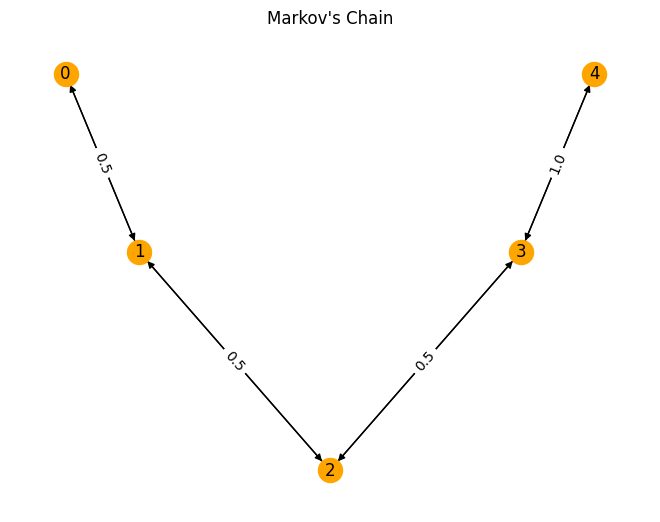

In [ ]:
P = np.array([[0. , 1. , 0. , 0. , 0. ],
              [0.5, 0. , 0.5, 0. , 0. ],
              [0. , 0.5, 0. , 0.5, 0. ],
              [0. , 0. , 0.5, 0. , 0.5],
              [0. , 0. , 0. , 1. , 0. ]])

gP = nx.from_numpy_array(P, create_using=nx.DiGraph)
#g = nx.DiGraph(gd) # dictionary to graph
def plot_gph(g):
    pos = nx.spectral_layout(g)
    nx.draw(g, pos, with_labels=True, node_color='orange')
    labels = nx.get_edge_attributes(g, 'weight')
    nx.draw_networkx_edge_labels(g, pos, edge_labels=labels)

plt.figure()
plot_gph(gP)
plt.title("Markov's Chain")
plt.show()


In [ ]:
transition_matrix

array([[0. , 1. , 0. , 0. , 0. ],
       [0.5, 0. , 0.5, 0. , 0. ],
       [0. , 0.5, 0. , 0.5, 0. ],
       [0. , 0. , 0.5, 0. , 0.5],
       [0. , 0. , 0. , 1. , 0. ]])

*Since there is a path from every state to every other state, hence the Markov chain represented by the transition matrix P is irreducible. *

In [ ]:
def stat_distribution(transition_matrix):
    eigvals, eigvecs = np.linalg.eig(transition_matrix.T)
    return eigvecs[:, 0] / eigvecs[:, 0].sum()

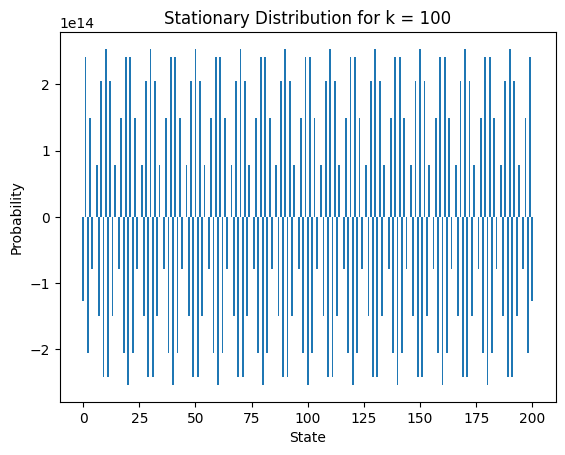

In [ ]:
k = 100
stationary = stat_distribution(generate_transition_matrix(k))
states = np.arange(2 * k + 1)

plt.figure()
plt.bar(states, stationary)
plt.title(f"Stationary Distribution for k = {k}")
plt.xlabel("State")
plt.ylabel("Probability")
plt.show()